In [1]:
using LightGraphs, GraphIO, GraphPlot, NetworkDynamics, OrdinaryDiffEq, Plots, LightGraphs, Printf


#f=open("net_celegans_neural.dat")




In [2]:
using LinearAlgebra, IterativeSolvers, Statistics

function get_levels(A)
    
    A= convert(Array{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    h= bicgstabl(Lambda, v, 10)
    #h=  lsmr(Lambda, v)   
       
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [3]:
function calc_troph_incoh(A,h)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        
    end
    
    F= F/sum(A)
    
end
    
    
    
    
    

calc_troph_incoh (generic function with 1 method)

In [4]:
function voter_model_update(x,g,N)
    
    
    x_old= copy(x)
        for i in 1:N
        
        in_connections= inneighbors(g,i)
        
        
        
        if isempty(in_connections)== false
            
            
            
        v = rand(in_connections)
        
        x[i] = x_old[v]
    
        #if x[i]==0
            #x[i]= sign(rand() - 0.5)
        #end
            
            else
            
            #x[i]= sign(rand() - 0.5 )
            x[i]= x_old[i]
        end
    end
    
    return x
end

voter_model_update (generic function with 1 method)

In [5]:
using SparseArrays


function maj_vote_update(x,g,N)
    
    
    for i in 1:N
        
        in_connections= inneighbors(g,i)
        
        sums = 0
        for v in in_connections
        sums= 1 + sums
        end
        
        x[i] = sign(sums)
    end
    
    
    
    
end



maj_vote_update (generic function with 1 method)

In [6]:
using LinearAlgebra, OrdinaryDiffEq, Random
using Arpack


segments = 20

instances= 30

number=instances*segments

T_list= zeros(0)

N=500


updates= 1000

#T_list= LinRange(0.025, 8, number)


T_list_org= 10 .^ (range(-1,stop=2,length=segments))


for a in 1:instances
    print(a)
    if a==0
        
    T_list = T_list_org    
    end
    
    T_list = vcat(T_list,T_list_org)
    
    end 

#T_list= 1.2*ones(number)

B=0

F_list = zeros(0)





L_targ = 5*N

stop= 2*N^2

eig_list= zeros(0)

r_list= zeros(0)

state_list = zeros(0)


#stop = 5

#w_in=1

for n in 1:number
   
    println(n)
    
    
    g = SimpleDiGraph(N)
    
   
    for i in (1+B):N
        
        pick = rand(B+1:N)
        
        add_edge!(g, pick, i)
        
        
        end 
    A = (adjacency_matrix(g))
    
    L=sum(A)
    
    h = get_levels(A)
    
    
    edgelist= Int[]
    
    problist= zeros(0)
    
    edge_start= zeros(Int64,0)
    
    edge_end = zeros(Int64, 0)
    
    
    for i in 1:N
        
        for j in (B+1):N
            
            if A[i,j]!=1 && i!=j
                #Fix Array indexing here doesn't make sense. Need 2d array
                append!( edgelist, [i,j] )
                append!( edge_start, i )
                append!(edge_end, j )
                
                prob = exp(-((h[j]-h[i] -1)^2)/T_list[n]/2) + 0.00000000000001
                
                
                
                append!( problist, prob )
            end
            
            
            
            end
        
            end 
    
    prob_sum = sum(problist)
    
    loop_size= size(problist, 1)
    
    
    
    #b=0
    
    #for d in 1:size(problist, 1)
        
        #b= A[(edgelist[d])[1],(edgelist[d])[2] ] + b
    #end
       
    #println(b)
        
    count=0
    
    #println(edgelist[500])
    
    while (-L + L_targ)>0
        
        count = count + 1 
        
        prob_sum = sum(problist)
        
        random = prob_sum*(rand())
        
        
        z=0
        
        
        for k in 1:loop_size
            
            z= z + problist[k]
            
           
            if z>=random
               
                if A[edge_start[k],edge_end[k]]==0
                
                   A[edge_start[k],edge_end[k]]=1
                    
                   problist[k]=0 
                
                    L = L +1
                    
                    break
                       
                else 
                    
                    println("Missed")
                    println(A[(edgelist[k])])
                    break
                   
              
                end     
            
            end
                end
            
            if (count-stop)>=0
            
                
                
            
                break
        
            
            
                end
        
    end
        
    
    
    

 
    
    
h = get_levels(A)
    
F= calc_troph_incoh(A,h)    
append!( F_list, F )  
    
#println(maximum(real(eigvals(Matrix(A)))))

    
append!( eig_list, maximum(real(eigvals(Matrix(A))))  )  

g= SimpleDiGraph((A))    
    
    

    
#x0 =  zeros(0) 
    
#frac=  0.*maximum(h) 
frac= floor(Int,0.05*N)
    
#for i in 1:N
        
      #append!(x0, (sign(h[i] - frac )) ) 
        
        
    #end

sorted = (sortperm(h))    
    
#x0 = sign.(h .- frac)
    
    
x0= ones(N)
   
    
for b in 1:frac
  
    x0[sorted[b]]= -1
    
    
    println(h[sorted[b]])
    end

    
x= x0 



for i in 1:updates
        
     voter_model_update(x,g,N)
        
        
        
    end
        
        
        
    
append!(state_list, sum(x))    
    
    
    
    
 
end



println(F_list)




1234567891011121314151617181920212223242526272829301
0.0
0.9999999306246039
1.9936334161624494
2.006366348056808
2.8004075185931274
2.9873219743459734
2.9883254401425017
2.9886725350360166
2.9887769334570207
2.992227665325882
2.9936335119694455
3.002570439414187
3.005254133483513
3.010727608461477
3.0268316726015403
3.0528264634124733
3.0901102174346846
3.125121390120996
3.2371326533667464
3.9520256387688217
3.954798894184603
3.96372530984525
3.9807199925629675
3.9822339010172536
3.983711696719073
2
0.0
0.009203471466216584
0.013653130100198752
0.09112226177005489
0.9364881241181031
0.9798200267066086
1.00000000911629
1.009203488149815
1.0608352303537227
1.2807972075265663
1.7230958861110999
1.8671523392390572
2.0384746316715407
2.074988392405732
2.3180952513568087
2.750250869891362
2.8131154454459946
2.8443324189049033
2.887549292884705
3.04894887069762
3.0891415474204766
3.286798913938334
3.3180952505033217
3.394351698441006
3.4407046705608817
3
0.0
0.010658971683810137
0.01425968397

0.0
0.030503264527529605
0.10774863862812345
0.20760701377143365
0.22241548381362541
0.23076167123813984
0.2438717767434151
0.2548688770580487
0.2606441542096195
0.2693757026465161
0.2800041046824683
0.2880674454446609
0.29411422814273125
0.3021803310177321
0.303216492621901
0.3034873064990917
0.3066178416345312
0.30765993448354134
0.3489495806687898
0.35500628545656443
0.35835638629194644
0.3610364176722053
0.36809136762618744
0.372790010978574
0.37712243001857904
20
0.0
0.08885212697409733
0.14762424233481908
0.15091888913241658
0.17041583122365928
0.19837983207127735
0.22987951680233065
0.2473626343580172
0.25809607374925836
0.2613904311094535
0.29095964759229404
0.30218570535331263
0.3056634909739463
0.3128097621908895
0.3170899755487692
0.3304726967415891
0.3473809967192477
0.34918569908016495
0.35410061720293295
0.35690788039361054
0.3576993647645069
0.3635620837250872
0.3765863488581986
0.37746553718851905
0.3971402976783207
21
0.0
0.00026459228958408687
0.0006047573514837978
0.

0.0
0.03895724659468258
0.09944422683981291
0.100424142469135
0.11161562178680307
0.13412223500751752
0.13910677285380557
0.16963733855683172
0.17166065772860112
0.18588315865319782
0.1926272419112794
0.20947510140751247
0.21308162663558639
0.223851648990415
0.2272105744702118
0.2643806474463929
0.27922933987712584
0.2990571312526612
0.3050504084609067
0.3192618331318831
0.3194240966273015
0.35631626340875333
0.38589611382273226
0.38883870128346154
0.39049032821280283
38
0.0
0.007852352847747102
0.009902622486046342
0.08593609737913788
0.10849177267588345
0.14373229601424609
0.149965432953428
0.15267712544070755
0.15405602105951577
0.15596944606087637
0.1617434814129553
0.16207568656186327
0.16968770289591184
0.17356133004631025
0.18029707127991645
0.18980512191566357
0.19341813441692207
0.20031785101188954
0.20161319715319959
0.20174475108512435
0.2018344898307089
0.20853918430926366
0.22548451837644462
0.231420667049484
0.24102823615976576
39
0.0
0.04190558920704557
0.105249595962961

0.0
0.0882875582673297
0.15933903156074303
0.21105510315914233
0.23264811070592117
0.3555517327426776
0.3839750543561051
0.38856000539904545
0.41685715305256843
0.41737164314315744
0.4376483659000937
0.4441052324553568
0.4540437842750884
0.4564214058935374
0.4715884451882958
0.4863423039473891
0.48766259410948787
0.5058737628385199
0.5085680987880867
0.5197499430673624
0.5201065843737721
0.5553285608555749
0.5640101404356327
0.5649126824918909
0.5712123697591375
56
0.0
0.029208318373851405
0.17221909341359742
0.24540167095437915
0.42992622832470895
0.5364711734824108
0.6413529819416248
0.6743101984968427
0.7052321931467651
0.7743302634546891
0.8422232819336859
0.8845403906679944
0.920696491036484
0.936824204132422
0.954436054120875
0.9621748224505606
0.9664723965695818
1.007871900598869
1.0281695092066663
1.056109441017003
1.0714688214952988
1.0745940942144068
1.1063418224391168
1.1163349474467972
1.1299690640039355
57
0.0
0.24446646668226357
0.2534808311158834
0.25432610756103036
0.31

0.0
0.2159899969289576
0.3170972717148661
0.4669127338333734
0.5226483164802032
0.6739642268550803
0.8293066632316748
0.875057694705009
0.93382545388023
1.0174663470028085
1.1242908084003096
1.1248062228610838
1.1253216874294871
1.1751196741942236
1.5329663751461382
1.5902403828464964
1.613284280156309
1.6347819574213363
1.7507232966746535
1.8058633099112296
1.8239923276447048
1.8571353217615503
1.8666646525044985
1.9885827616283578
2.139830765388165
74
0.0
0.006279066361829511
0.11508492221241706
0.13957572584606392
0.1804531605211892
0.23957603306317132
0.2712825569864248
0.31582607391732354
0.3312019538423385
0.4051189104781703
0.4498770098078424
0.4617231839431004
0.4705756083526904
0.48243774636759706
0.48658486262186174
0.4963027672896958
0.49702981955818304
0.5107902648880945
0.5117591445690871
0.5395904785746799
0.5464710847963823
0.5507002702696601
0.5951287535839336
0.6000297436861172
0.6004263063926745
75
0.0
0.06509683030891522
0.12386001615730746
0.2574462726833474
0.28995

0.0
0.15032868177871528
0.22756650262703415
0.34567522964114383
0.42142143255981734
0.4447226171080212
0.45777419729715163
0.4643672951215456
0.4926455957364051
0.49330933559327717
0.5317612569365497
0.5461327733469328
0.5892263194746401
0.6119462809259759
0.6166181110635622
0.6540578981370122
0.6849505535544749
0.7019692867836875
0.7348932927288505
0.7641513594227534
0.7730377694015931
0.7841286753852978
0.8280633864579969
0.8622361844614881
0.8824369719538385
92
0.0
0.010684439468271911
0.018073377443752925
0.0710534654085393
0.10401949244056485
0.24022305517267473
0.2408327924341842
0.27017717198287894
0.31338793204653026
0.3154355515403662
0.32885257613917496
0.3306882337790089
0.3398255043467806
0.34400239139729827
0.4143872577899357
0.5202653103500117
0.5483514257156576
0.5573569405651222
0.6712223389366043
0.7277496614775094
0.7404718641487698
0.824104610781915
0.8366101030015942
0.8821350231299796
0.9180832633544966
93
0.0
0.098953547063382
0.19319289791161776
0.286647282376927

0.0
0.12461673177235522
0.2753147363568642
0.3075596863124819
0.4921652132737844
0.5512252384995548
0.5641033494268815
0.6855955428128819
0.6925925287347443
0.7051373265756267
0.728706388016243
0.8056487244029453
0.8312418549226024
0.8816849843020815
0.9541234795429352
1.0540185520200076
1.147492211724967
1.1537798415475358
1.1662848885907753
1.1779771340376488
1.2275125642578688
1.2548371205997935
1.2996984631684523
1.3389324178195077
1.410010036356013
110
0.0
0.07241699109552169
0.09844565936377458
0.10418808919119238
0.12417737402834828
0.13194812059464756
0.15715229530764807
0.17538387576303593
0.1989351775679551
0.20237243227871593
0.22096709892803013
0.25898763530066615
0.274090497436144
0.2764008069518842
0.2866752905071732
0.28713765750214737
0.3185013494736726
0.33096603589337636
0.33470342203326764
0.33972409234117906
0.3426339327806578
0.35321924435878005
0.3829372520360588
0.3834548719483428
0.38510076395528303
111
0.0
0.0989933545793642
0.1297388482536901
0.194227989448296

0.0
0.09884582798098229
0.1131505567846589
0.15255032220805198
0.2860486082160918
0.3648918485949413
0.371409323562518
0.4367624323722574
0.44373512718166275
0.4688632462871116
0.5996464928606606
0.6857889449764278
0.7724542774241949
0.8962579842577776
1.0624278183601001
1.0986720968179797
1.1889468121117988
1.2139025717120404
1.2185047107240716
1.2550420305026138
1.3206804521714912
1.364891838873592
1.390442408878621
1.5556752107016243
1.5740561196532394
128
0.0
0.0032597052963438955
0.03709438967290524
0.05455888312721413
0.059546938606032995
0.1729776080199148
0.2935726611063725
0.5172680356503729
0.9088894599071855
0.9372611920843807
0.9685688192797839
1.1253822781903438
1.1265822605610696
1.361254040265388
1.3960013303144745
1.487652185201914
1.5464885533311126
1.5525868586250127
1.6388059691215044
1.6918425970755706
1.7257846439174438
1.750314992004884
1.923947559267515
1.9630600444960145
2.162179864774415
129
0.0
0.1708266244901071
0.29335811215300245
0.2934586305921032
0.591775

0.0
0.006653961875304759
0.9866920767640615
1.0399237716035685
1.6469296740448272
1.7178235805155992
1.8619670603127432
1.8886021807023212
2.2245151737488627
2.448955084605924
2.6871173121471728
2.6893941343487633
2.7372420345071653
2.8619670665515002
2.9387654594105257
3.5258200824086394
3.59288435956492
3.6423495966662216
3.6526432739788035
3.701161060039059
3.9204165806879097
3.9363658808936
4.200948799982946
4.2750509239351935
4.382117548969525
146
0.0
0.09017778474778293
0.18729509285411883
0.3180669571042838
0.35770128200032225
0.38021697044861913
0.4109749174802726
0.4720164785525309
0.4941357625299059
0.513576000366144
0.5497349594753693
0.5872494897117981
0.7768334598273361
0.8832653075005696
0.9502711745178667
0.9558338384312712
1.043506035373892
1.0848519903575538
1.116321736924049
1.1253969338156251
1.1723658231581657
1.2136459795516643
1.3514714005512296
1.3622151377054177
1.363897319245119
147
0.0
0.12659387397006583
0.14537513154632364
0.4239896683728226
0.88312011376877

0.0
0.05264578136150888
0.08595758753700622
0.10917912087654003
0.13092838470694446
0.28796470963066056
0.29374041707447773
0.8743532766921511
0.9629361904354568
1.0287956089669805
1.0646417405483568
1.104119380799009
1.1258537406977034
1.3022400058915764
1.8388415760560655
1.8725482807155487
1.9265506994220711
1.942969418194771
1.952835193574968
2.0335521816777096
2.0500730845087762
2.0754779733652526
2.6167295158474655
2.7081230388417534
2.7393933925910154
164
0.0
1.0000000005022889
1.6766031494620544
1.8088045808987863
1.8578461627325167
1.9609108258901395
2.039089175958294
2.0602209144190624
2.232114050405886
2.2419425096016745
2.4276203802237593
2.6320014835216474
2.742075543787201
2.769924576158841
2.7984232342182436
2.857981865221281
3.0078633451919483
3.0658553817554113
3.4894025678901075
3.5780256681532494
3.582633041865403
3.7662298605592444
3.861704636618316
3.940577219377598
4.1392831151766405
165
0.0
0.09163590858608472
0.7153010832541309
0.7462075549167473
0.7763264671397

0.0
0.015994144953605627
0.021041166184765814
0.03198829004817583
0.9434502161412937
1.0195144713112345
1.0256526425614823
1.0451996475857541
1.0581920213308216
1.0799561996918232
1.6245606022421288
1.7116836419789934
1.7491630444236694
1.7519419714100959
1.754219381364738
1.7649838969859477
1.7714826218831643
1.804419815645101
1.8097351991428994
1.8131515358733612
1.8281927435787964
1.8432034339286254
1.8441130913855766
1.881367629051942
1.9017443608046403
182
0.0
0.00511928121005667
0.04491670464553543
0.05660673738109345
0.12075458338657796
0.12078719939811577
0.12871378062482286
0.1291618414583784
0.13071345063985085
0.13226507616065852
0.15275526882965806
0.1597552774705857
0.1663059699895726
0.1919204519141804
0.19268277177463666
0.21542115424039565
0.29700827486266057
0.3209284273093882
0.4333902568922561
0.5785059500995775
1.0109271708589
1.1004952306980327
1.1013407545281195
1.1326448021330426
1.143265824914483
183
0.0
0.030380517847266475
0.058588606275566946
0.08174744646841

0.0
0.1985583412536538
0.24888388571461428
0.33207515330355886
0.42727067179851197
0.4471948465273252
0.5005499436860616
0.5182375355316973
0.5310171127236203
0.5525577750398132
0.5684027088468779
0.5992039052046991
0.6304194329702866
0.6348405295576307
0.6369707798772914
0.6466000321863408
0.6969687801817805
0.6986211556843326
0.7160404382119511
0.716397746421802
0.7177757818150325
0.7241218161383564
0.7298272429427162
0.7341872665951167
0.7367466596349694
200
0.0
0.1127825120332242
0.2612156537146114
0.2792589598302929
0.30504220402990856
0.3189789873597978
0.3342608987619251
0.3413077542193297
0.3515939341300127
0.37541280990738546
0.3780765129126268
0.3808726810803227
0.39437910314026914
0.4170617288430978
0.4236631490799131
0.44238563688398513
0.4452330432298911
0.4567721471720433
0.47570259818939453
0.4793791509782106
0.47993057615410617
0.49515901867565365
0.5016281165403843
0.5293773612550741
0.5305949761654964
201
0.0
0.0012746502960734318
0.0015764230819819147
0.0018130104420

0.0
0.02368454376173179
0.14161946377627843
0.21263210411931865
0.2465731759925191
0.2774589378303331
0.2824538647568279
0.33190382187232553
0.3536927267422271
0.36095465794728665
0.3911283193838157
0.39623957382178304
0.3964726178327776
0.4032319841537982
0.4041504492814705
0.40870325778489835
0.4113387565905286
0.4205282955938823
0.42246160670774074
0.48707168004163914
0.4911943573809492
0.4928311006965905
0.508861494993977
0.518861927042934
0.527394801644768
218
0.0
0.08987898459164678
0.14439720994496508
0.202751984174659
0.21596950855507657
0.24817328451691667
0.2571873659737529
0.2672716909122719
0.3008929126064894
0.323470073248981
0.32688892270712344
0.34784481000540124
0.35681660678243143
0.37339892066101976
0.4140692806680617
0.42092967849208174
0.4484918185407858
0.4526518036675735
0.45382169900208935
0.4945987566020984
0.5013862587298379
0.5226057134995991
0.5249857712128659
0.5434947181126394
0.5608276744646131
219
0.0
0.09946105802940186
0.16368356275704476
0.240914988248

0.0
0.08438782122223376
0.08954900768592222
0.11692311192440052
0.12127765369880916
0.18814664598022857
0.20011321958315853
0.2337551366927797
0.2681576042360594
0.2913937557968258
0.32144163704645656
0.36696307438228026
0.3824498426789045
0.38583434998272836
0.4132884099818033
0.4260189983364904
0.4357058730020127
0.4644775000925614
0.480635723064466
0.5108317459074918
0.5108558811635646
0.5314122208694947
0.5409415888957796
0.5455460907440708
0.5578465227823417
236
0.0
0.04603377814890508
0.11931152252492705
0.14827499512924835
0.19267152231131635
0.19661530231866853
0.1983573515202236
0.22645022537603843
0.2742190130438119
0.2862470567814973
0.2955237649779252
0.31246915635100014
0.3203256174055703
0.33119456527488805
0.33303830930076905
0.33520732384898977
0.37428347189036887
0.3777740395205224
0.3836982461030505
0.39870249347034853
0.42186224903899716
0.42518214898005585
0.43400453491442
0.43934964638823487
0.44462336584228596
237
0.0
0.08251400193379421
0.17057365962908744
0.2425

0.0
0.028529688408944986
0.12362564293250666
0.1754690985539893
0.26535303643166386
0.5776675729058587
0.6237317239158195
0.6238714017961862
0.6719613750561906
0.6823806029723837
0.6842002869642773
0.7338431841012972
0.7577575885577356
0.7698114185608199
0.7704433982120912
0.7769260534607279
0.8046699512181114
0.8103085307761811
0.8349493635421444
0.847298359737185
0.8529186965830228
0.8769945142858784
0.8830182941349969
0.8855609015147551
0.893993244331244
254
0.0
0.06448258170159216
0.24034099165211464
0.27184425008877455
0.30247020947223446
0.3127285878428654
0.3837857601498562
0.43017447546776566
0.4366469229159602
0.43938054777618807
0.4432108935730008
0.4559908923530682
0.4619845985063573
0.46722817961579843
0.49238787900609693
0.5054769149263625
0.5203900820458776
0.5575343437254074
0.5641219154556141
0.5691103971270544
0.5747700377628011
0.585642224143236
0.5875914324723219
0.6069224400539603
0.6368573652336698
255
0.0
0.08464005672526698
0.11349314009135081
0.1300080598985578


0.0
0.03156729755960974
0.28948045000398537
0.5473936033597262
0.5675396145280045
0.8534994849216506
0.9832892556762589
1.259844650936647
1.3058435947812237
1.3222522803810763
1.367576846157882
1.4085458621164593
1.4140806781240505
1.4798795026624845
1.573268276230828
1.584874924715332
1.6372978172041313
1.7551300692260305
1.797377862364959
1.8599176409163238
1.8620085687983012
1.912326175895319
1.9618931164640872
2.0025782940597816
2.034431502572426
272
0.0
0.07803658831028581
0.16572397835486807
0.2203754370460973
0.2859642552492274
0.2926967733414072
0.5640156058392969
0.5885500381802742
0.5959708206187764
0.6593636586839735
0.6765223482844678
0.8371850574599002
0.8564917579989886
0.9194433770480228
0.9222498714420744
0.9379834373017535
0.949292487332468
1.0034688136310508
1.005844525687857
1.0389374039949124
1.0582946807751683
1.072648570288926
1.0848443783895578
1.1143358858513803
1.1852008588645213
273
0.0
0.03449256153197622
0.22856257313359896
0.29804981105757244
0.328571130340

0.0
0.816747944412036
1.0359339192823178
1.1473181353626778
1.4173380964686721
1.5865020073213358
1.6305169793086058
1.754434226408911
1.7724475828846167
1.9263409324479532
1.962273757122933
2.084052734113211
2.0918498413793642
2.303950699754864
2.3439738828083634
2.4379052470548626
2.5117304067438315
2.576398177112475
2.5819774452165074
2.58533331814421
2.7671134796005603
2.788116127646637
2.8136377165820896
2.9306930693750086
2.9809445385240974
290
0.0
0.003927880281072937
0.029958995135983102
0.07397086935608055
0.07499810185610656
0.08640753492090347
0.09459516153232705
0.1349923880995867
0.17633123462126044
0.17668765313527235
0.17839749358786783
0.190897624317385
0.20331784751613569
0.20633770981442368
0.21636967208685576
0.2459540272212548
0.2485351589193492
0.28964301270740567
0.2951622719926794
0.29619118776813913
0.2974830926782799
0.3312696934685606
0.3333018015126328
0.3390675506433771
0.34499941652368715
291
0.0
0.2261848382940581
0.3340998469357821
0.3822281643681027
0.40

0.0
1.0302860786737256e-9
0.7636787185419287
0.8032452453063614
0.8775703075718733
0.8914017719505338
1.6269321924355014
1.6641039648907912
1.7828035423125757
1.849907384122119
2.2259366113679855
2.5459414253062027
2.795858962114398
2.8222444662705177
3.2280885485666504
3.2286331781096065
3.3908894078711453
3.545941419642479
3.828576068213819
3.893950597936805
3.923017611929416
3.9739962166583482
4.017711147220622
4.3448045430440585
4.4105838998830915
308
0.0
0.047071876977117455
0.08489096203670243
0.19060133123595335
0.26240758769774963
0.2767792609000752
0.29631169464749263
0.31283884602222134
0.5661979136925757
0.5891538988600513
0.6040764285297486
0.6553293300021208
0.8331068790705394
0.8885245985251671
0.9305393807807789
0.9369750020691883
0.9756979142042002
1.0111804230655066
1.0554954714484883
1.0629502674423579
1.1218179538033715
1.1286082018745542
1.1669819910926496
1.1731995870142669
1.1906742128126142
309
0.0
0.001499085050190141
0.045283450772879874
0.17089597739510332
0.2

0.0
0.27335164617940677
0.6074279552243169
0.8458688553939844
0.8939125025114301
1.3378115101992165
1.4844724446966744
1.6917378225104116
1.7166481430009206
2.361517008157911
2.753818391863117
3.0764842000235113
3.1684633282967596
3.3615169922537262
3.76973719583086
4.050932153098373
4.068675464719366
4.106007209807551
4.129286166284757
4.231905938875379
4.8942241256528725
5.000821526494704
5.09010910575665
5.1355302973896855
5.563064982685447
326
0.0
0.9197157007523522
1.0802842991951715
1.2539874698850362
1.312177069889807
1.3695847764774207
1.4177854353307477
1.4435073960225608
1.4810068509640484
1.6068609629405435
1.639375350422715
1.7279190146995584
1.7586912029436106
1.8473929845963477
1.8795872828180245
2.1166509735750196
2.212180288232225
2.2288565530554254
2.287989194461794
2.36125402819201
2.415897178209223
2.5559971902249523
2.559928645574446
2.615232146856352
2.7558660473085825
327
0.0
0.005761906524083926
0.026682291289732873
0.08347864012325479
0.0853662832782962
0.139263

0.0
0.9999999726157665
1.0000000256065569
2.0000000311219193
3.0000000095104404
3.999999978345226
4.541601788490759
4.764750957683156
4.781686704992894
4.802090225681988
4.838876099975765
4.849175769476245
4.8768803193790875
4.885419727758912
4.887790473300777
4.890620005922926
4.899662088286775
4.903365867840586
4.9195856022507884
4.954701658025314
4.969054118691895
4.978185476682967
4.983754256430036
4.995550316521089
5.001463009933969
344
0.0
0.19653171354519472
0.27560533711269386
0.31637236555465975
0.3269958216577109
0.6642555519067557
1.160316799363592
1.2008670735272169
1.2756052902780972
1.3126835798174028
1.3502046872511677
1.7185286053203264
1.9574228224413588
2.4622980892374002
2.794650405027326
2.8261095703293364
2.8553351787274828
3.15988735055603
3.5702665083674
3.5741362929207448
3.837542142502322
3.8894919446837974
3.9958401862732558
4.042917984398297
4.060813947268674
345
0.0
0.02005051484002962
0.03505433636783195
0.22873000897032014
0.2886249928679483
0.320344775339

0.0
0.0028977587963225915
0.012547424390595197
0.031891777592431225
0.0365632831916205
0.037225930367400295
0.04291843856567823
0.04761889031583699
0.04937207122416609
0.059876721594594784
0.05996452463583957
0.06626069090560449
0.12137312120579402
0.9632558210800521
0.9818882429309497
0.9865833441530949
0.9964914702690368
1.0038960050628063
1.0360425790215153
1.0445344550852145
1.0607085890844097
1.063459340263126
1.0822704835614871
1.0943465237143517
1.2020110277393723
362
0.0
0.0009139325194205128
0.0015993853424731697
0.0018278683303716292
0.9974866846053718
1.0029702871082815
1.9949733745820435
1.9974866823278052
2.0134805210565343
2.9642707098241683
3.00487566569109
3.0052635277700013
3.032207749815637
3.7704470126577743
3.8515847332671216
3.866020889428774
3.8826273702238723
3.89423308716309
3.904849518939085
3.9145791634950218
3.918389368072421
3.920266648535251
3.9799695845859198
3.9846702731908605
4.038815883571226
363
0.0
0.028104983410280227
0.9437900323084456
1.08431494928

0.0
0.13393690039255834
0.22300496851724483
0.3018842910905324
0.3150839515459376
0.37156708773205716
0.39333023386939736
0.3952045183363515
0.40832106638106325
0.47618964448203527
0.49357722244164104
0.500696152846404
0.5020158692302195
0.5060208737344767
0.5070413974427568
0.5195122582421727
0.5280173406018778
0.5416998052581661
0.5451162353696926
0.5706136475982977
0.5819887556078065
0.5830959061793697
0.5907902618476726
0.5915682298590856
0.6030816767949561
380
0.0
0.09392018340955055
0.13323865628001785
0.21227693367372746
0.22270059863819114
0.2614675589823826
0.29907885774056986
0.30200049730464196
0.33337928072399203
0.35209872523287
0.3535620816423829
0.3623300967715437
0.39899519325665567
0.4109240116746259
0.4239353036556657
0.4404907158103054
0.4626527065936831
0.47936603402336503
0.4824866418750573
0.48272988198410355
0.4895801909801542
0.5015281698380113
0.5153933208117049
0.517953854013528
0.5205664166996347
381
0.0
0.0036233207653628696
0.004031800668307106
0.0042596349

0.0
0.128990230723959
0.1308467074721289
0.143817769095961
0.24771150374324613
0.25339953905204404
0.26284112586375297
0.27107008597918913
0.2763199479412417
0.28322562834178766
0.2999554806441026
0.3304501929028284
0.3444043931987326
0.37564222452240703
0.37726128507876566
0.39379610477984217
0.40262183267460083
0.4165871497514726
0.4348336886605988
0.43843625613636816
0.44605600027452375
0.4736878707270248
0.49668559454721284
0.4970440226857785
0.5017673497920327
398
0.0
0.012357485637042753
0.04950471506544729
0.09215367716492517
0.12704882532372141
0.14112327716338036
0.15570549237305475
0.1575803602651773
0.19428837039916602
0.24745346484328845
0.32288847439731283
0.38661304284219056
0.39637445852143716
0.3971566093256157
0.4161388238181296
0.41949719951897535
0.4224157299807926
0.4710030364430018
0.4721596194165416
0.4874931533630421
0.4877669702055719
0.4934660260582563
0.5008245699763203
0.5111809613973404
0.5191632543960629
399
0.0
0.15475324598228535
0.165138580498998
0.19448

0.0
0.021406654837523575
0.070525827415858
0.08468044323843182
0.09593300260827142
0.15808561436027802
0.23744696149532452
0.28936129285069656
0.35151405570015815
0.36038843827658074
0.3633171479512507
0.376662373004065
0.4262404337698862
0.4567461180926071
0.45775776259001155
0.49164970792281704
0.4979426996982639
0.5152347592018565
0.5173726187115755
0.5212029631135695
0.5212820483001033
0.5491956863802103
0.5565285269785736
0.5651224908150978
0.5667104039799731
416
0.0
0.016216643989148682
0.05745029467185758
0.1072688358876317
0.11304188302600293
0.2379341123016614
0.24308990490078464
0.2876292237211162
0.30226526924022856
0.3267862711703555
0.3339706232099635
0.3731405354163613
0.439783055208008
0.4749245497978274
0.4830155447059341
0.5071159192045602
0.5575474887481187
0.5804017902163716
0.5949271501553894
0.6009912135204973
0.6045840830654186
0.6107400151768878
0.6205763684299279
0.6346416355560933
0.6383118569797603
417
0.0
0.1498861825136374
0.19294695795378625
0.2325209706739

0.0
0.12501320967202556
0.17953570891477177
0.2693570692098035
0.30071732950119845
0.38922977240003576
0.45135111890469926
0.5475043771811521
0.6055493179392837
0.6176516440903796
0.7347769179240866
0.7468681536920942
0.806722613498501
0.8516848801783681
0.8720329264347089
0.9221786193138657
0.9346844378153194
0.9403454969448957
0.9518034174018077
1.110788876895311
1.1184211642345252
1.1402708374485724
1.14196619519209
1.142545709308056
1.1605831196144023
434
0.0
0.07287170340100824
0.12052191428504999
0.14073655735788382
0.16869031407583068
0.17490239817633957
0.21422983284560249
0.22207862176127624
0.28427527432710864
0.2910678496933945
0.3360047407379838
0.37715085343489085
0.4146890564014776
0.4246350367802463
0.4429475439528576
0.4616137893158967
0.46770190802524714
0.46971779429965754
0.4864872054977212
0.49543799744813977
0.5243299435645736
0.5276035537093173
0.5305057832335962
0.5393012774837576
0.5395615610549427
435
0.0
0.04708136438657662
0.17143230440185375
0.17510252170901

0.0
0.12357967661639435
0.12613472162884598
0.1646789437828764
0.16591712114793356
0.264243429641273
0.2813214554689716
0.36144691742416657
0.36762254540616257
0.3913614952325497
0.41178242569597345
0.44713650421750084
0.4603384269997488
0.4628169051585942
0.5038293028740937
0.5580422683752861
0.5786773554475075
0.5787123343342366
0.5866527868383786
0.5896600056966652
0.5912014504282821
0.6004643413912487
0.6024610251641567
0.6046077024117489
0.6065618655407943
452
0.0
0.008849257747720163
0.10758997185242025
0.3944838367472898
0.5226226645610059
0.6470010754479505
0.838363447593165
0.8554158550179807
0.8625259102713971
0.8937459973436703
0.9486078585671125
0.9995504126692025
1.009074096079258
1.032656712725061
1.0527528435331872
1.1709051431398803
1.196486528487561
1.2163205944129145
1.2594203792168148
1.2626226914928873
1.2923629814600477
1.2940022018493482
1.328654118301857
1.3371304751296402
1.3418421693423066
453
0.0
0.08599859094469497
0.48982685928434755
0.5014326034321028
0.649

0.0
0.009249656996577649
0.08427671580443619
0.09471197430432898
0.10837929422194481
0.1783201429716632
0.19919334961279667
0.2658358293206389
0.4368702477041113
0.5606199722835932
0.6924273560969363
0.7034282565376948
0.713012038958535
0.7422851794316783
0.7800152701974232
0.8447470505841741
0.9381758750995388
1.0879746570048532
1.0974425528421534
1.1003597722877458
1.1599172282792596
1.3100755177669896
1.3167604133057962
1.3587436411763498
1.3601792594778086
470
0.0
0.40057357327376497
0.4352467963916582
0.4458058637913562
0.5158091829556435
0.5295493570837517
0.7318584879894834
0.7530469896744307
0.7788732879171567
0.950626607402008
1.0179111121825288
1.1262935279864839
1.1580154654220705
1.2138105649195818
1.3349315578574266
1.339301020820269
1.3499610698885776
1.4032732185767047
1.4083666294476682
1.449064122873207
1.6417729069131695
1.6907852321466104
1.7574473365222554
1.8170566412531919
1.8559198297714183
471
0.0
0.25490776369854684
0.49073703160590343
0.5098155356701177
0.7806

0.0
0.07630356865459209
0.10674979290262332
0.34854344070150045
0.483360271129893
1.0281173958771896
1.0838062593508084
1.0917927174995645
1.2033214883434287
1.4086981275912311
1.5417354224177648
1.6204862092427543
1.7167114422908964
1.8623031055176078
1.9649649742704378
2.1752709585526215
2.1781614002795093
2.2700552341654543
2.3411370004626155
2.3776131304839536
2.3798890039181666
2.3953586107306206
2.46919733870895
2.473617472723963
2.5065059983188602
488
0.0
0.11503024822022567
0.2848898357433818
0.29816033687850485
0.3250058055297469
0.3651217771768369
0.5926333608885646
0.6079420659719208
0.8750746636321072
0.9490282537897983
1.0413788850899763
1.1233342639396149
1.2116205380984688
1.313155193161034
1.3148474926305571
1.4401599269320204
1.5654796094146732
1.5899081094095031
1.7387082071487328
1.929184281640099
1.9847635877600425
1.9891186284601243
2.061942383782858
2.4056984297054527
2.461771049569327
489
0.0
0.08204611689301444
0.12690526118264245
0.3358825400279173
0.3852364139

0.0
0.058744515385930285
0.12087147092495876
0.3441377666989478
0.5590575607786086
0.5827521201454235
0.5926456156524456
0.7126529935130073
0.7462771213998245
0.7742880450627787
1.1208714470267385
1.3080882014749662
1.3334430051473518
1.3725787894137476
1.4253060174539929
1.5587469049294853
1.7918175241235978
2.0517877225462886
2.059427943046339
2.2823401068192677
2.4584841682010783
2.465662833878609
2.656191279923112
2.716391711542144
2.8093470704276253
506
0.0
0.21778553092733066
0.6896836003918567
0.78958910583503
1.0851562317976224
1.2564178999410203
1.334117767821735
1.3603749484143925
1.449173911686934
1.4693862906016655
1.5060803082796594
1.5450102661171776
1.5593042279971243
1.5738902064697546
1.5840025601632552
1.6147242237108577
1.6548147394973576
1.6835551246529903
1.708069382436964
1.7266030236440884
1.7991403982455383
1.8474861433892311
1.9080903684725037
1.9185363257901367
2.016325903818097
507
0.0
0.34955139821057557
0.3614893566948756
0.4364589395289218
0.59770137891922

0.0
0.019452029975226992
0.9610959428410908
0.9765261346267096
0.9903533029884075
1.0163935205499524
1.129621317092366
1.1334392244172173
1.6922419842439833
1.7754696716406109
1.8705458137488549
1.8777341206663962
1.8809753343447424
1.9551885242864753
1.997099204090003
2.0055537116480453
2.0133350135234673
2.020150109591005
2.03301637273361
2.0382686054068424
2.056609343762781
2.066240332524992
2.1010482286603906
2.106744161502216
2.1079692901193914
524
0.0
0.011025085132928325
0.015830504416456392
0.13908159046149393
0.8498933228362624
0.8578363219765635
0.8928330108015672
1.178376512843851
1.6906025325814156
1.7374348141566216
1.7769429397528285
1.8227718293091648
1.846580389635644
1.909890076074518
2.0334419332718277
2.504574796790422
2.5819742773045036
2.69604955711792
2.7035058452884257
2.7176461542307067
2.9043059497151056
2.937323878001301
3.2851769972845197
3.3850046551922297
3.4078403454005333
525
0.0
0.1700660957539304
0.23745128086382028
0.26843820255919404
0.291017908447655

0.0
0.007419983354628457
0.01483996671416854
0.9258001664308555
0.9674240066149684
1.0845158768884522
1.8370673494867944
1.8844892281242371
1.892911271169834
1.916775918028466
1.9457870987777666
1.9817108203437934
2.0257866419966017
2.1007234887509814
2.706710692337789
2.84714689131041
2.8615585401394226
2.8789057638271993
2.884981233419845
2.887779242830484
2.894103675309937
2.900340632748943
2.904188210140301
2.9047651100726437
3.2313483518410315
542
0.0
0.051959828369183114
0.07990590808543452
0.09173544986234283
0.7525208518250768
1.0263406624609068
1.0380165669213088
1.0394266435656316
1.0412972326673522
1.0659328660202192
1.067892663516389
1.0745337277363962
1.2363449530246413
2.0212176052094364
2.027168977467099
2.0341437957126303
2.044049879189627
3.013869039508471
3.019772322957685
3.045292195872909
4.003955570573089
4.008328585043733
4.008674460908718
4.016583326836569
4.188766609848246
543
0.0
0.0260602254716904
0.05027787844147902
0.13368862937782033
0.13496965956954554
0.1

0.0
0.007631034394131819
0.03296406727766066
0.046089811219933496
0.048519571792499216
0.05862651106896166
0.07411071555204041
0.076147499677646
0.10844558563110185
0.11183094955516215
0.18498561103074873
0.1974414778267607
0.21308016567456767
0.23095322183406253
0.2406418611209541
0.2461947077351596
0.2520543932972661
0.2531889630155354
0.25366068645297846
0.282522087673691
0.298988687998193
0.3142506434112857
0.32007841269648263
0.33484182223991565
0.3362663430267322
560
0.0
0.13058187479441763
0.2321109152801677
0.25838681928014395
0.2820049357241219
0.2910938983560083
0.30020303384811764
0.31082367511284725
0.34733199129220793
0.3473978034771237
0.3655249730311583
0.3841886982583892
0.3978919133411436
0.4062496204115591
0.418381763813245
0.4209503986643228
0.42178397097831655
0.4313959392536024
0.4422345418784325
0.44824360601705027
0.449812234275492
0.46123390761258487
0.46748154996327884
0.47003203959760786
0.4727480943821407
561
0.0
0.00020562003182966748
0.0004966930015424253
0

0.0
0.07678659184392889
0.20465566436658666
0.2577237969047814
0.29481840594906683
0.2991009874999504
0.3067642329151893
0.323909361565218
0.3723183163334496
0.38975403335801395
0.3986509282063436
0.4253835556234241
0.4343220054464032
0.4380876489504891
0.4812017628541629
0.48222304972193314
0.49139826517164864
0.5231259092320821
0.5393742674524643
0.543745989360295
0.5559308318855252
0.5597591847882659
0.5733131237858801
0.5735487918208859
0.5845375930143919
578
0.0
0.0005134658454164498
0.06145762394671217
0.11161087152755478
0.11663045637250047
0.13124961561633097
0.2246397259992805
0.23372807234627313
0.241342843057333
0.27143431993277956
0.27649040263953406
0.2770502815628517
0.2783721066738636
0.29302999136720054
0.30559897310059925
0.3103023143902146
0.31084588462875207
0.3592234790337653
0.36898044853068657
0.37257634176560295
0.38233964498770145
0.3946996647132035
0.39761405657613047
0.39866310819312456
0.3989768330330369
579
0.0
0.00884396321550529
0.05478033603021881
0.15855

0.0
0.03204474057440576
0.14505964754919853
0.1928953907984048
0.20447280139429047
0.23363970717560223
0.24339113999453232
0.28997287597949706
0.31509153080153185
0.3168290257809043
0.347810956706355
0.35087827319036125
0.3673137037624965
0.3818603532080913
0.3871105146443168
0.3966896524541381
0.4011388037262589
0.41391241693084657
0.428217108150982
0.44675756038177594
0.44700335807945324
0.45520655223657647
0.4590016912122268
0.4605440298276817
0.4678805367902985
596
0.0
0.02995416515082505
0.11048491948755812
0.16578826354843024
0.2513794854175848
0.25306067741754346
0.28223880376705157
0.29043686138534097
0.2949583425200468
0.3080583971574198
0.3754706102703036
0.3937712653937866
0.41815550078664954
0.42620058651660164
0.49788054148523253
0.5315656282221428
0.544342774456601
0.5445558638128989
0.5532251131648458
0.6141254644362444
0.6145247698955743
0.6227598391696103
0.6813775608106905
0.7263189810927322
0.7394822529284666
597
0.0
0.1627658696581894
0.17893752656456713
0.263144503

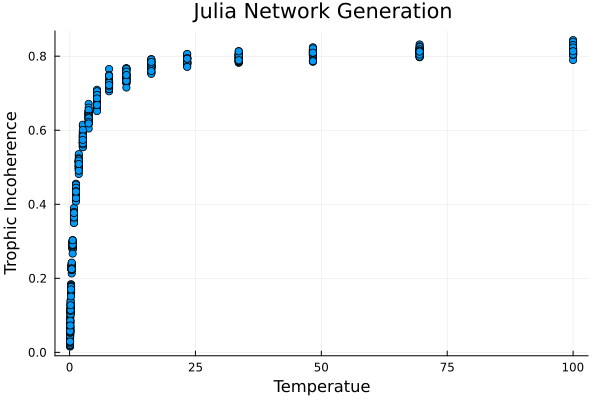

In [7]:
using Plots

plot(T_list,F_list, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation")

#savefig("Julia_generation_log_space.pdf")

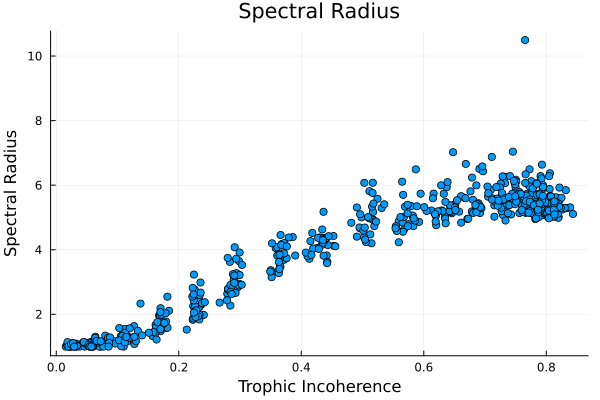

In [8]:
#println(eig_list)

plot(F_list, eig_list, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Spectral Radius", title= "Spectral Radius")


#savefig("Julia_generation_Spec_radius_logspace_2.pdf")

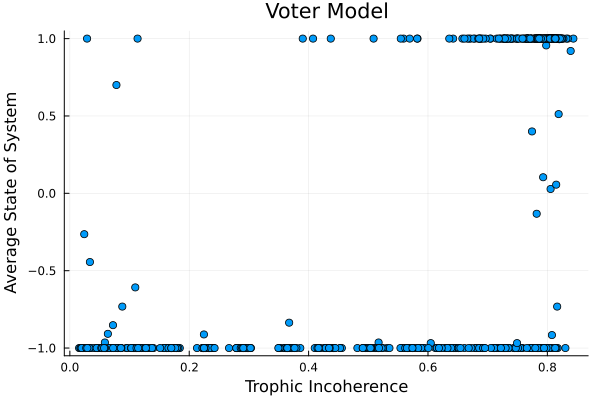

In [9]:
plot(F_list, state_list/N, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Average State of System", title= "Voter Model", ylim=(-1.05,1.05))


#savefig("Voter_model__N_500_lowest_5_percent_test.pdf")

In [10]:
F_org= copy(F_list)

T_org= copy(T_list)

S_org= copy(state_list/N)

600-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  ⋮
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -0.968
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0

In [11]:
using Statistics

T_list=(reshape(T_list,(segments,instances)))

F_list=(reshape(F_list,(segments,instances)))

S_list=(reshape(state_list/N,(segments,instances)))


F_mean =zeros(segments)
F_error =zeros(segments)

S_mean= zeros(segments)

S_error= zeros(segments)

T_mean = zeros(segments)

print(T_list[1,:])

for a in 1:segments
    
    print(T_list[a,:])
    
    F_mean[a] = mean(F_list[a,:])
    
    F_error[a] = std(F_list[a,:])
    
    T_mean[a] = mean(T_list[a,:])
    
    S_mean[a] = mean(S_list[a,:])
    
    S_error[a] = std(S_list[a,:])
    
    
    end 

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1][0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1][0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628, 0.14384498882876628][0.20691380811147897, 0.20691380811147897, 0.20691380811147897, 0.2069

[23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223, 23.357214690901223][33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 33.59818286283783, 

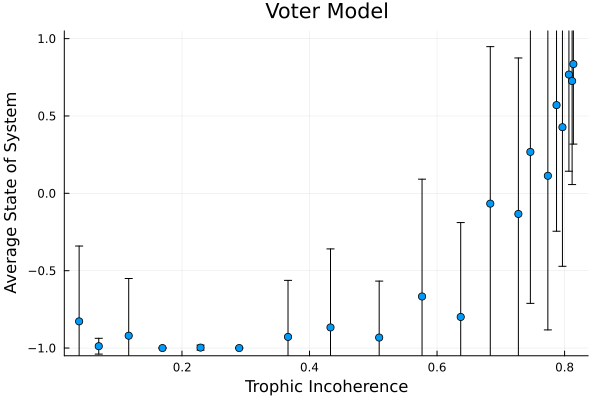

In [12]:
plot(F_mean, S_mean, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Average State of System", title= "Voter Model", ylim=(-1.05,1.05), yerror = S_error, error=F_error)


#savefig("voter_model_standard_dev_N_500_K_5_30_repeats.pdf")

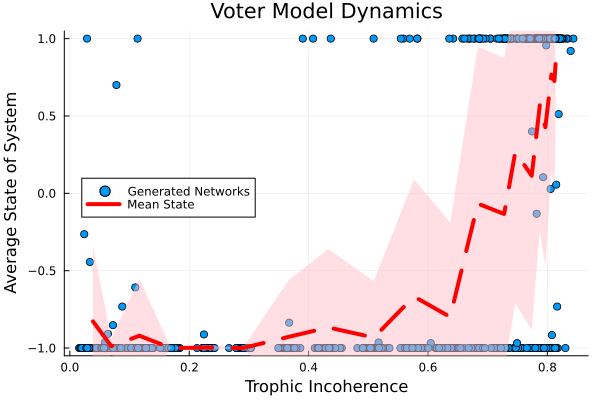

In [20]:
plot(F_org, S_org, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Average State of System", title= "Voter Model Dynamics", ylim=(-1.05,1.05), ; label="Generated Networks")

plot!(F_mean,S_mean, lw=4,   line=:red, ls=:dash, fillalpha=.5, c=:pink,ribbon=S_error , label="Mean State", legend = :left)

#savefig("voter_model_5_percent_standard_dev_N_500_K_5_30_repeats.pdf")


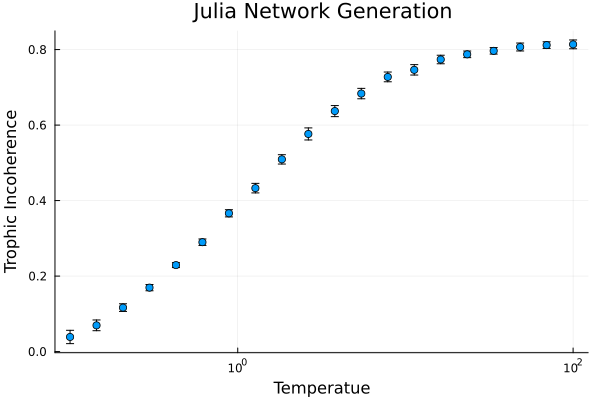

In [14]:
plot(T_mean,F_mean, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation", xaxis=:log, yerror= F_error)

In [15]:
plot(F_list, cos.(phase_list), seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Cosine of Average Phase", title= "Final Phase when the lowest tenth modified")

#savefig("Kuramoto_0.1_controls_dynamics_2.pdf")

LoadError: UndefVarError: `phase_list` not defined

In [16]:
plot(eig_list, r_list, seriestype = :scatter, legend = false, xlabel= "Spectral Radius",

ylabel="R Phase Coherence", title= "Oscillator Synchronization Spectral Radius")